## Set up

In [1]:
%run -i ../notebooks/functions/functions.py
%run -i ../notebooks/functions/ML_functions.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
master_df = pd.read_csv('../processed_data/master.csv')

#split out lat, long info
X = master_df.iloc[:, 2:]
lat_lng = master_df.iloc[:, 0:2]

In [5]:
#Scaling the data
scaler = StandardScaler()
#fit scaler to data
scaler.fit(X.values)

#transform and save into new dataframe
X_std = pd.DataFrame(scaler.transform(X.values), 
                                columns = X.columns)
    
X_std.head()

,Population,traffic,buildings,legalstories,DAY CARE,NON-PUBLIC K-12 SCHOOLS,HOSPITALS AND CLINICS,PUBLIC K-12 SCHOOLS
0,0.440912,-0.648090,-0.441038,-0.956712,0.186406,-0.284193,-0.904477,-0.797435
1,-0.884045,-0.563233,-0.458273,-0.340367,-1.049961,-1.028054,-1.082632,-1.009000
2,-1.131434,0.043021,-0.542293,-0.395411,-0.926324,-0.098228,-0.191859,-0.797435
3,-0.630074,3.516461,-0.574608,3.690858,-0.308141,-1.028054,-0.548168,-1.220564
4,0.531145,-0.563233,0.172957,-0.050830,-0.926324,-0.656124,-0.191859,1.529774


## Radar Plots

### K-means

In [6]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', random_state=1)
## clustering
clusters = model.fit_predict(X_std)

#Create dataframe with scaled data and cluster info
cluster_df = pd.concat([X_std, pd.DataFrame(clusters)], axis=1)
cluster_df = cluster_df.rename(columns = {0: 'clusters'})

In [7]:
df_list = []
X_plt = pd.concat([lat_lng, cluster_df], axis=1)
#for each cluster seperate from master dataframe and append to list
for i in range(0, k):
    df_list.append(X_plt.loc[X_plt['clusters'] == i])

#zip each clustered dataframe in the list
cluster_dfs = llz_set(df_list)

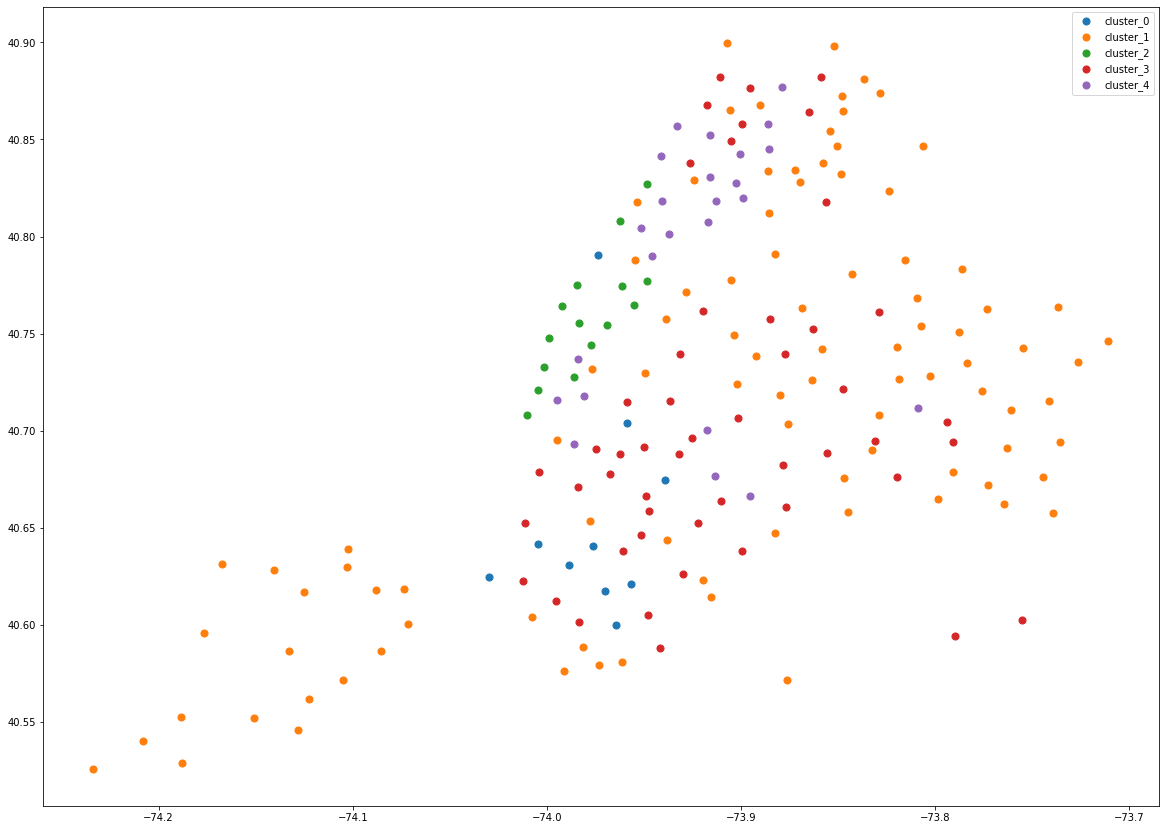

In [8]:
fig,ax=plt.subplots(figsize=(20,20))

#loop through each cluster
for i in range(len(cluster_dfs)):
    cluster_dfs[i].plot(ax = ax, markersize = 50, marker = 'o', label = f"cluster_{i}")
plt.legend()

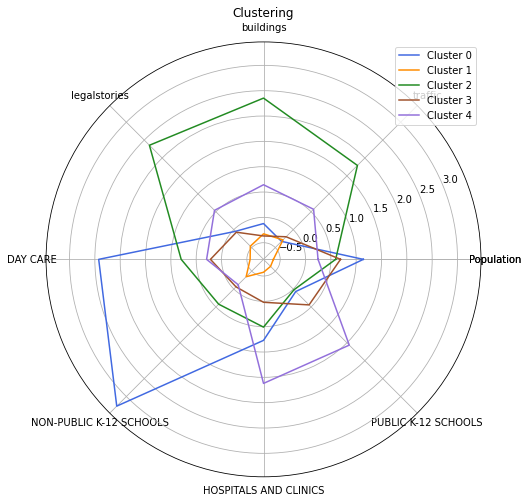

In [9]:
radar_plot(X_std, clusters)